In [1]:
#Set Up data
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Rahul Tamhankar\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Rahul Tamhankar\anacond

In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [3]:
import tensorflow as tf
import os

In [8]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [14]:
pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
#Import OpenComputerVision and imghdr to get the directory of image
import cv2
import imghdr

In [35]:
data_dir='C:\Rahul\Projects\Deep CNN\data'

In [36]:
os.listdir(data_dir)

['happy', 'sad']

In [37]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [40]:
img=cv2.imread(os.path.join(data_dir, 'happy', 'pexels-photo-7551233.jpeg'))

In [41]:
print(img)

[[[ 95 107 109]
  [ 97 109 111]
  [ 98 110 112]
  ...
  [110 168 173]
  [111 166 171]
  [113 168 173]]

 [[ 98 110 112]
  [ 96 108 110]
  [ 96 108 110]
  ...
  [110 168 173]
  [112 167 172]
  [114 169 174]]

 [[ 99 108 111]
  [ 99 108 111]
  [ 99 108 111]
  ...
  [114 170 175]
  [114 168 175]
  [116 170 177]]

 ...

 [[  6  36  23]
  [  6  39  25]
  [  7  40  26]
  ...
  [ 46 156 138]
  [ 46 157 137]
  [ 51 156 137]]

 [[  5  35  22]
  [  5  38  24]
  [  6  39  25]
  ...
  [ 45 157 139]
  [ 41 154 134]
  [ 48 155 136]]

 [[  4  34  21]
  [  5  35  22]
  [  3  36  22]
  ...
  [ 46 158 140]
  [ 43 155 137]
  [ 49 156 137]]]


In [42]:
img.shape

(3100, 4650, 3)

In [44]:
from matplotlib import pyplot as plt

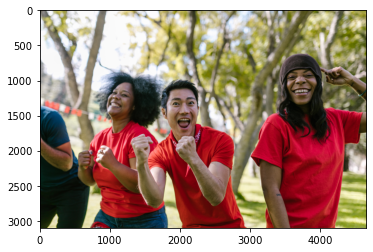

In [47]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
#Remove invalid format images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Remove images not in valid format'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [50]:
#Load the data. We use tensorflow tf dataset api as it has lot of capabilities
import numpy as np
from matplotlib import pyplot as plt

In [51]:
tf.keras.utils.image_dataset_from_directory??

In [53]:
#This is building our data pipeline
data_fetched = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 149 files belonging to 2 classes.


In [55]:
#Now i have used data_iterator to continuously fetch data one by one in a batch from above data pipleline
data_iterator=data_fetched.as_numpy_iterator()

In [59]:
#get next batch of size 32 images from iterator
batch_next=data_iterator.next()
len(batch_next)

2

In [60]:
batch_next[0].shape

(32, 256, 256, 3)

In [87]:
#Here class 1 = SAD and 0 = HAPPY
batch_next[1]

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

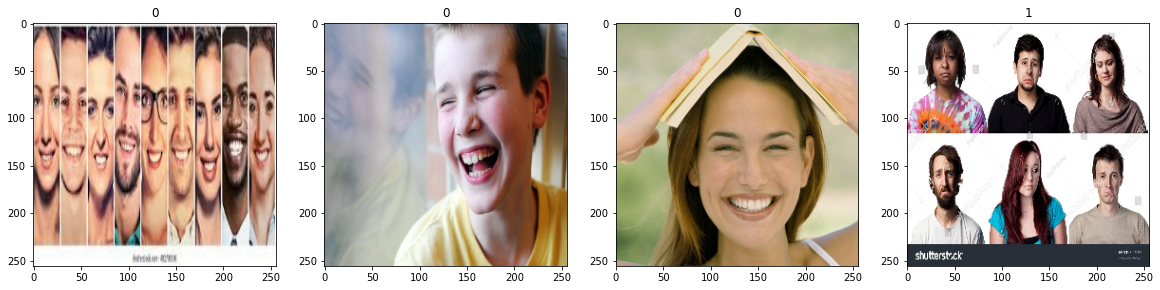

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for imgid, img in enumerate(batch_next[0][:4]):
    ax[imgid].imshow(img.astype(int))
    ax[imgid].title.set_text(batch_next[1][imgid])


In [89]:
import sklearn.preprocessing

In [100]:
#Data preprocessing on images to scale the vales of each image between 0 and 1 rather than 
#0 to 255. This will help our image classifier produce faster results. We also divide the data
#into train,test and validate to make sure we dont overfit
scaled_batch = data_fetched.map(lambda x,y: (x/255, y))
scaled_batch

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [102]:
batch_iterator=scaled_batch.as_numpy_iterator()

In [111]:
batch=batch_iterator.next()
batch

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334],
          [0.93333334, 0.93333334, 0.93333334]],
 
         ...,
 
         [[0.93333334, 0.93333334, 0.93333334],
          [0.93333

In [138]:
len(scaled_batch)

5

In [139]:
train_size = int(len(scaled_batch)*.7) # 3 batches of 32 images each
val_size = int(len(scaled_batch)*.2)#Good practice to have training and validation to finetune model
test_size = int(len(scaled_batch)*.1)+1

In [149]:
test_size+val_size+train_size

5

In [141]:
#Skip and train in tensorflow pipeline tells how much data to take for train,val and test
train = scaled_batch.take(train_size)
val = scaled_batch.skip(train_size).take(val_size)
test = scaled_batch.skip(train_size+val_size).take(test_size)

In [143]:
#Building the deep learning model using the keras sequential api as we only have 1 ip and 1op.
#tensorflow has 2 types of model building api 1.seq and 2.functional which is for multiple ip and multiple op
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [144]:
model=Sequential()

In [145]:
#We will first add Convelutional 2D layer with 16 filters, 3x3 pixels, and stride=1 1pxl per sliding window
#relu function will convert the op of 1st layer into -ve values to 0 and keep the +ve values. The keras will
#convert the image into 256x256 and 3 channels deep.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())# divides 4 pixels to 2 ie1/2

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #Remove the 3 filters

model.add(Dense(256, activation='relu')) #condensing 256 neurons to 1 point
model.add(Dense(1, activation='sigmoid'))#single op with sigmoid fun ie. 0 or 1

In [146]:
#We will use adam optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [147]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [150]:
#20 epochs means 20 runs on the entire training set, validation_data will let us see how the model
#is performing in real time
#Loss should go down and accuracy should go up ideally while running
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
3/3 [==============================] - 13s 3s/step - loss: 1.0252 - accuracy: 0.5833 - val_loss: 0.6045 - val_accuracy: 0.7812
Epoch 2/20
3/3 [==============================] - 11s 3s/step - loss: 0.6186 - accuracy: 0.6146 - val_loss: 0.5666 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 0.5901 - accuracy: 0.6562 - val_loss: 0.5508 - val_accuracy: 0.6250
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 0.5730 - accuracy: 0.7292 - val_loss: 0.4726 - val_accuracy: 0.8125
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 0.5552 - accuracy: 0.6875 - val_loss: 0.4980 - val_accuracy: 0.8438
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.5460 - accuracy: 0.7396 - val_loss: 0.4551 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 0.4577 - accuracy: 0.7188 - val_loss: 0.4705 - val_accuracy: 0.6250
Epoch 8/20
3/3 [==================

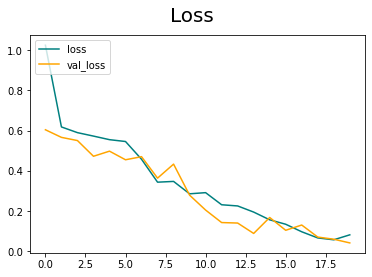

In [151]:
#Plot the performance of model. Here is validation loss starts increasing 
#it means model is overfitting, we can then do regularization of change the data
# if loss line increases it means NN is not learning and not able to reduce loss
#we can check the training data or use a more better NN
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

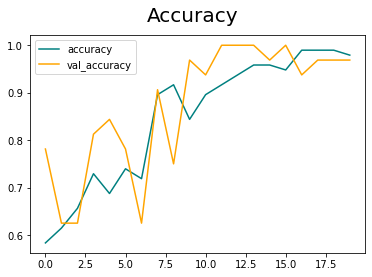

In [152]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

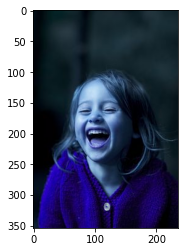

In [172]:
#testing the model
img = cv2.imread('happytest.jpg')
plt.imshow(img)
plt.show()

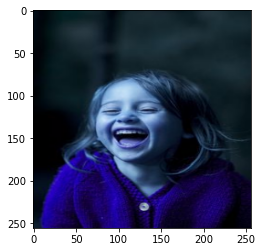

In [173]:
#Convert the image into 256x256
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [174]:
test = model.predict(np.expand_dims(resize/255, 0))
test

array([[0.34428167]], dtype=float32)

In [175]:
if test > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [176]:
#Save the model

In [177]:
from tensorflow.keras.models import load_model

In [178]:
model.save('imageclassifier.h5')

In [179]:
new_model = load_model('imageclassifier.h5')

In [180]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.34428167]], dtype=float32)